In [9]:
import matplotlib.pyplot as plt
import numpy as np

from numpy.typing import NDArray

In [10]:
def pseudoinverse(A: NDArray[np.float64]) -> NDArray[np.float64]:
    """
    Computes the pseudoinverse of a matrix A using SVD.
    """
    m, n = A.shape
    U, s, Vt = np.linalg.svd(A)
    s_inv = np.zeros((n, m), dtype=np.float64)
    for i in range(len(s)):
        if s[i] > 1e-8:
            s_inv[i, i] = 1.0 / s[i]

    return Vt.T @ s_inv @ U.T

In [11]:
A = np.array([[2, 4], [1, 3], [0, 0]], dtype=np.float64)
A_pinv = pseudoinverse(A)

print("Original matrix A:")
print(A)
print("Pseudoinverse of A:")
print(A_pinv)

Original matrix A:
[[2. 4.]
 [1. 3.]
 [0. 0.]]
Pseudoinverse of A:
[[ 1.5 -2.   0. ]
 [-0.5  1.   0. ]]


In [ ]:
def lss(A: NDArray[np.float64], b: NDArray[np.float64]) -> NDArray[np.float64]:
    """
    Computes the least squares solution to the system Ax = b."
    """
    A_pinv = pseudoinverse(A)
    return A_pinv @ b

In [13]:
A = np.array([[2, 3], [4, 5], [6, 7]], dtype=np.float64)
b = np.array([1, 2, 3], dtype=np.float64)
x = lss(A, b)
print("Solution x to the least squares problem Ax = b:")
print(x)

Solution x to the least squares problem Ax = b:
[0.5 0. ]


In [ ]:
def pca(X: NDArray[np.float64], L: int) -> NDArray[np.float64]:
    """
    Computes the PCA of the data matrix X and returns the first k principal components.
    """
    N, D = X.shape
    X_c = X - np.mean(X, axis=0)    # Broadcasting
    U, s, Vt = np.linalg.svd(X_c, full_matrices=False)

    # Eigenvalues and Eigenvectors of the covariance matrix
    eigenvectors = Vt[:L]
    eigenvalues = s[:L] ** 2 / (N - 1)

    W = eigenvectors.T
    Z = X_c @ W

    return Z, eigenvalues, eigenvectors

In [15]:
np.random.seed(0)
X = np.random.rand(10, 3)
L = 2
Z, eigenvalues, eigenvectors = pca(X, L)
print("PCA transformed data Z:")
print(Z)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

PCA transformed data Z:
[[ 0.03663356 -0.07355037]
 [-0.1403412   0.08075599]
 [-0.19597676 -0.19719992]
 [ 0.1385564   0.03273801]
 [ 0.60427013 -0.04559457]
 [-0.49555553  0.60316904]
 [-0.22051144 -0.45106603]
 [-0.24137611 -0.17674101]
 [ 0.40576099  0.43900806]
 [ 0.10853997 -0.2115192 ]]
Eigenvalues:
[0.10807453 0.09888321]
Eigenvectors:
[[-0.00296404  0.477063   -0.8788641 ]
 [-0.76811634 -0.56383081 -0.30346681]]


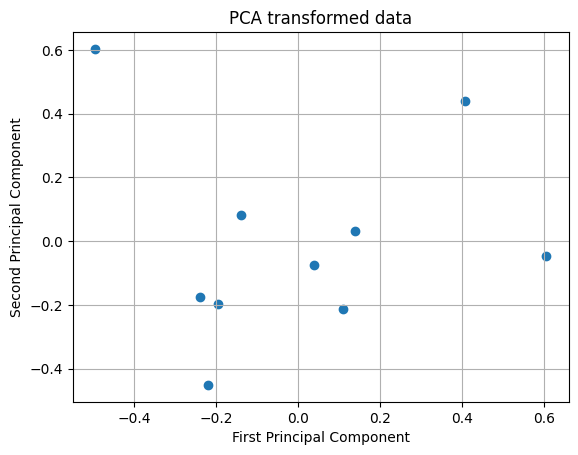

In [19]:
plt.scatter(Z[:, 0], Z[:, 1])
plt.title("PCA transformed data")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.grid()
plt.show()